In [15]:
import os
import glob
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import cPickle as pkl
import matplotlib.colors as mcolors

In [16]:
import utils as util
import process_datafiles as procd

process_datafiles.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/

In [17]:
reload(util)
reload(procd)

utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-package

<module 'process_datafiles' from 'process_datafiles.pyc'>

In [18]:
# def combine_cohorts_to_dataframe(phasemeta, cohorts=[], excluded_animals=[]):
    
#     if len(cohorts) == 0:
#         cohorts = sorted(metadata['cohort'].unique(), key=natural_keys)
#     print("combining data from %i cohorts:" % len(cohorts), cohorts)
    
#     dflist = []
#     for (cohort, animalid), animal_meta in phasemeta.groupby(['cohort', 'animalid']):
#         if animalid in excluded_animals:
#             print("... skipping %i" % animalid)
#             continue
            
#         if cohort not in cohorts:
#             continue

#         a_df = procd.sessiondata_to_df(animalid, paradigm, animal_meta, rootdir=rootdir)
#         if a_df is None:
#             print("... no DF found: %s" % animalid)
#             continue
#         a_df = a_df.reset_index(drop=True)

#         #included_sessions = check_against_manual_sorting(animalid, phase)
#         #currdf = a_df[a_df['session'].isin(included_sessions)].copy()
    
#         #### Update some sorting values
#         a_df['animalid'] = [animalid for _ in np.arange(0, len(a_df))]
#         a_df['cohort'] = [cohort for _ in np.arange(0, len(a_df))]
#         #a_df['phase'] = [phase for _ in np.arange(0, len(a_df))]

#         dflist.append(a_df)
        
#     df = pd.concat(dflist, axis=0).reset_index(drop=True)
    
#     return df

In [19]:
def combine_cohorts_to_dataframe(metadata, cohorts=[], excluded_animals=[]):
    
    if len(cohorts) == 0:
        cohorts = sorted(metadata['cohort'].unique(), key=natural_keys)
    print("combining data from %i cohorts:" % len(cohorts), cohorts)
    
    dflist = []
    for (cohort, animalid), animal_meta in metadata.groupby(['cohort', 'animalid']):
        if animalid in excluded_animals:
            print("... skipping %i" % animalid)
            continue
            
        if cohort not in cohorts:
            continue
            
        a_df, _ = procd.get_animal_df(animalid, paradigm, metadata, create_new=False)
        
        if a_df is None:
            print("... no DF found: %s" % animalid)
            continue
        a_df = a_df.reset_index(drop=True)

        #included_sessions = check_against_manual_sorting(animalid, phase)
        #currdf = a_df[a_df['session'].isin(included_sessions)].copy()
    
        #### Update some sorting values
        a_df['animalid'] = [animalid for _ in np.arange(0, len(a_df))]
        a_df['cohort'] = [cohort for _ in np.arange(0, len(a_df))]
        
        dflist.append(a_df)
        
    df = pd.concat(dflist, axis=0).reset_index(drop=True)
    
    return df

In [20]:
rootdir = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

processed_dir = os.path.join(rootdir, paradigm, 'processed')

metadata = util.get_metadata(paradigm, rootdir=rootdir, filtered=False, create_meta=False)


Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl


In [21]:
cohort = 'AL'

#### Load phase info for cohort
phase_dfile = os.path.join(processed_dir, 'meta', 'phases_%s.pkl' % cohort)
assert os.path.exists(phase_dfile), '[%s] Phase meta does not exist.' % cohort

with open(phase_dfile, 'rb') as f:
    phaseinfo = pkl.load(f)
    

In [22]:
#### Get all animals in specified cohorts
cohort_list = [cohort]
excluded_animals = []
cohortdf = combine_cohorts_to_dataframe(metadata, cohorts=cohort_list)


('combining data from 1 cohorts:', ['AL'])
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [135]:
# standard_phases = [1, 2, 3, 4, 5]
# standard_ = phaseinfo[phaseinfo['phase'].isin(standard_phases)]

#### Select phase to analyze
curr_phase = 5
curr_phaseinfo =  phaseinfo[phaseinfo['phase']==curr_phase]


In [136]:
phaseinfo[phaseinfo['phase']==curr_phase].groupby(['animalid']).count()


,cohort,datasource,session,suffix,phase,protocol,experiment
animalid,,,,,,,
AL1,40,40,40,40,40,40,40
AL10,17,17,17,17,17,17,17
AL11,29,29,29,29,29,29,29
AL12,9,9,9,9,9,9,9
AL13,30,30,30,30,30,30,30
AL14,38,38,38,38,38,38,38
AL15,35,35,35,35,35,35,35
AL16,39,39,39,39,39,39,39
AL2,38,38,38,38,38,38,38


In [137]:
phaseinfo['phase'].unique()

array([ 1,  2,  3,  5, -1,  8])

In [138]:
dlist = []
for (animalid, session, suffix), g in curr_phaseinfo.groupby(['animalid', 'session', 'suffix']):
    
    tmpd = cohortdf[ (cohortdf['animalid']==animalid) 
                    & (cohortdf['session']==session) 
                    & (cohortdf['suffix']==suffix) ]
    
    dlist.append(tmpd)
df = pd.concat(dlist, axis=0)


In [139]:
df[['animalid', 'session']].drop_duplicates().groupby(['animalid']).count()

,session
animalid,
AL1,40
AL10,17
AL11,29
AL12,9
AL13,30
AL14,38
AL15,35
AL16,39
AL2,38


# Create output dir

In [36]:
outdir = os.path.join(rootdir, paradigm, 'processed', 'performance')
if not os.path.exists(outdir):
    print("making dir")
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/behavior-data/threeport/processed/performance


# Create heatmaps

In [37]:
def format_size_depth_ticks(ax, xvals=[], yvals=[]):
    
    ax.set_xticks(np.arange(0, len(xvals)))
    ax.set_xticklabels(xvals)
    
    ax.set_yticks(np.arange(0, len(yvals)))
    ax.set_yticklabels(yvals)
    
    return ax

In [38]:
#combine two color maps for 0-50% and 50-100% as in the PNAS paper
colors1 = pl.cm.bone(np.linspace(1,0.,128))
colors2 = pl.cm.hot(np.linspace(0.,1,128))
colors = np.vstack((colors1, colors2))
pnas_cmap = mcolors.LinearSegmentedColormap.from_list('pnas_map', colors)


In [43]:
cohort

'AL'

In [44]:
default_size = 30
default_depth_rotation = 0.
default_planar_rotation = 0.

if cohort in ['AL']:
    expected_sizes = np.linspace(15, 40, 11.)
    expected_drots = np.linspace(-60, 60, 25.)
    default_size = 40
    
elif cohort in ['AG']:
    expected_sizes = np.linspace(15, 40, 6.)
    expected_drots = np.linspace(-60, 60, 9.)


expected_size_interval = np.diff(expected_sizes).mean()
expected_drot_interval = np.diff(expected_drots).mean()


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  import sys


In [45]:
# sizes = sorted(np.unique([s for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))
# objects = sorted(np.unique([o for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))
# depth_rotations = sorted(np.unique([d for (o, d, s), _ in g.groupby(['object', 'depth_rotation', 'size'])]))

# print("Objects:", objects)
# print("Sizes:", sizes)
# print("Depth rotations:", depth_rotations)


In [114]:
object_ids = df['object'].unique()
HMAPS = dict((animalid, dict((k, []) for k in object_ids)) for animalid in df['animalid'].unique())

dlist = []
i=0
for (animalid, session, sfx), agroup in df.groupby(['animalid', 'session', 'suffix']):
    datakey = '%s_%s_%s' % (animalid, session, sfx)
    
    for objectname, ogroup in agroup.groupby(['object']):
        hmap = np.zeros((len(expected_sizes), len(expected_drots)))

        for (drot, sz), sgroup in ogroup.groupby(['depth_rotation', 'size']):

            n_trials = float(sgroup['outcome'].shape[0])
            perc_correct = len(sgroup[sgroup['outcome']=='success']) / n_trials

            r_ix = list(expected_sizes).index(sz)
            c_ix = list(expected_drots).index(drot)

            hmap[r_ix, c_ix] = perc_correct

            dlist.append(pd.DataFrame({'perc_correct': perc_correct,
                          'n_trials': n_trials,
                          'size': sz,
                          'depth_rotation': drot,
                          'objectid': objectname,
                          'animalid': animalid,
                          'session': session,
                          'suffix': sfx}, index=[i]))
            i+=1
    
        HMAPS[animalid][objectname].append(hmap)

perfdf = pd.concat(dlist, axis=0)       

In [115]:
for animalid, hmap_d in HMAPS.items():
    HMAPS[animalid] = dict((k, np.dstack(v)) for k, v in hmap_d.items())

In [116]:
HMAPS['AL1']['1'].shape

(11, 25, 2)

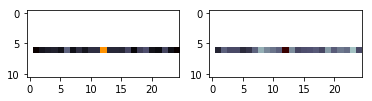

In [117]:
fig, axes = pl.subplots(1,2)
ax = axes[0]
ax.imshow(HMAPS['AL1']['1'].mean(axis=-1), vmin=0, vmax=1, cmap=pnas_cmap)
ax = axes[1]
ax.imshow(HMAPS['AL1']['2'].mean(axis=-1), vmin=0, vmax=1, cmap=pnas_cmap)


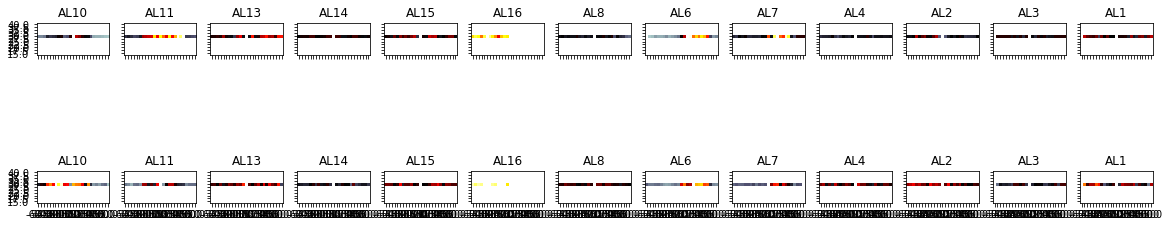

In [118]:
fig, axes = pl.subplots(2, len(HMAPS.keys()), figsize=(20, 5), sharex=True, sharey=True)

for ai, (animalid, hmap_d) in enumerate(HMAPS.items()):
    for oi, okey in enumerate(['1', '2']):
        ax = axes[oi, ai]
        hmap = hmap_d[okey].mean(axis=-1)
        ax.imshow(hmap, origin='bottom', cmap=pnas_cmap)
        format_size_depth_ticks(ax, xvals=expected_drots, yvals=expected_sizes)
        
        ax.set_title(animalid)


In [119]:
perfdf.head()

,animalid,depth_rotation,n_trials,objectid,perc_correct,session,size,suffix
0,AL1,0,28.0,1,0.785714,20170909,30.0,
1,AL1,5,16.0,1,0.812500,20170909,30.0,
2,AL1,10,16.0,1,0.812500,20170909,30.0,
3,AL1,15,23.0,1,0.826087,20170909,30.0,
4,AL1,20,19.0,1,0.684211,20170909,30.0,


In [129]:
len(perfdf['animalid'].unique())

13

In [131]:
col_list = sns.color_palette('colorblind', n_colors=len(object_ids))
object_colors = dict((k, c) for k, c in zip(object_ids, col_list))
object_colors

{'1': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 '2': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745)}

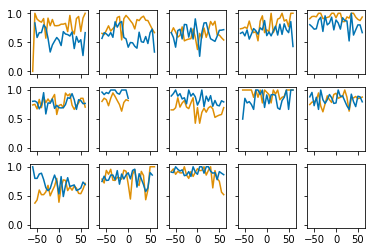

In [134]:
fig, axes = pl.subplots(3, 5, sharex=True, sharey=True)

for ai, (animalid, agroup) in enumerate(perfdf.groupby(['animalid'])):
    ax = axes.flat[ai]
    for objectid, ogroup in agroup.groupby(['objectid']):
        
        tested_values = [v for v, g in ogroup.groupby(['depth_rotation'])]
        performance_values = [g['perc_correct'].mean() for v, g in ogroup.groupby(['depth_rotation'])]

        ax.plot(tested_values, performance_values, color=object_colors[objectid])

In [126]:
g

,animalid,depth_rotation,n_trials,objectid,perc_correct,session,size,suffix
797,AL8,60,22.0,2,0.863636,20170803,30.0,b


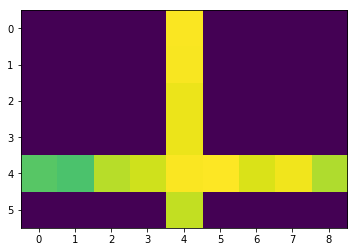

In [134]:
pl.figure()
pl.imshow(HMAPS['AG7']['1'].sum(axis=-1))

In [139]:
test = perfdf[perfdf['animalid']=='AG7'].sort_values(by=['size', 'depth_rotation'])['size'].values


In [141]:
perfdf[perfdf['animalid']=='AG7'].groupby(['size', 'depth_rotation']).mean()

n_trials  perc_correct       session
size depth_rotation                                       
15.0  0              23.000000      0.515236  2.016096e+07
20.0  0              22.888889      0.589425  2.016096e+07
25.0  0              22.833333      0.657536  2.016096e+07
30.0  0              22.666667      0.673753  2.016096e+07
35.0 -60             22.833333      0.544722  2.016096e+07
     -45             22.722222      0.521032  2.016096e+07
     -30             23.000000      0.643056  2.016096e+07
     -15             22.722222      0.678376  2.016096e+07
      0              22.888889      0.690913  2.016096e+07
      15             22.777778      0.717852  2.016096e+07
      30             22.888889      0.655659  2.016096e+07
      45             22.666667      0.661555  2.016096e+07
      60             22.888889      0.547195  2.016096e+07
40.0  0              22.833333      0.695929  2.016096e+07

In [163]:
sorted(perfdf[perfdf['animalid']=='AG7']['session'].unique())

[20160913, 20160915, 20160920, 20160921, 20160922, 20161012, 20161013]